In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [3]:
diabetes = pd.read_csv('../../data/diabetic_data_initial.csv')

In [4]:
diabetes.shape

(101766, 50)

In [5]:
diabetes_df = diabetes.replace('?', np.nan)

missingness

In [6]:
missing = pd.DataFrame({'variable':[col for col in diabetes_df.columns],
                        'missingness':\
                        [diabetes_df[col].isnull().sum()/len(diabetes_df) for col in diabetes_df.columns]})
missing = missing.sort_values('missingness', ascending = False).set_index('variable')
missing.head(10)

,missingness
variable,
weight,0.968585
medical_specialty,0.490822
payer_code,0.395574
race,0.022336
diag_3,0.013983
diag_2,0.003518
diag_1,0.000206
encounter_id,0.000000
tolazamide,0.000000


In [7]:
diabetes_df.readmitted.value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

binarizing target variable

In [8]:
diabetes_df['readmit_30d'] = (diabetes['readmitted'] == '<30')

In [9]:
diabetes_df.readmit_30d.value_counts()

False    90409
True     11357
Name: readmit_30d, dtype: int64

In [10]:
diabetes_df['patient_nbr'].value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
             ..
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, Length: 71518, dtype: int64

In [11]:
diabetes_df.drop_duplicates(subset = ['patient_nbr'], keep = 'first', inplace = True)
diabetes_df = diabetes_df[~diabetes_df['discharge_disposition_id'].isin([11,13,14,19,20,21])]
diabetes_df.drop(diabetes_df.loc[diabetes_df.gender=='Unknown/Invalid'].index, inplace=True)

In [12]:
diabetes_df.shape

(69970, 51)

In [13]:
diabetes_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'readmit_30d'],
      dtype='object')

In [14]:
diabetes_df.iloc[:,len(diabetes.columns)//3-1:len(diabetes.columns)//3*2+1].sample(5)

,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide
8205,0,0,0,722,413,401,9,None,>7,No,No,No,No,No,No,No,No,No
9152,0,0,0,414,428,745,6,None,None,Steady,No,No,No,No,No,No,No,No
15368,0,0,0,786,250,414,7,None,>8,No,No,No,No,No,No,No,No,No
52864,0,0,0,427,428,401,4,None,None,No,No,No,No,No,No,No,No,No
49022,0,0,0,162,496,518,6,None,None,No,No,No,No,No,No,No,No,No


Race

In [15]:
race = pd.DataFrame(diabetes_df['race'].value_counts())
race.columns = ['Count']
race

,Count
Caucasian,52292
AfricanAmerican,12625
Hispanic,1500
Other,1149
Asian,488


Text(0.5, 1.0, 'Percent of patients readmitted within 30 days by race')

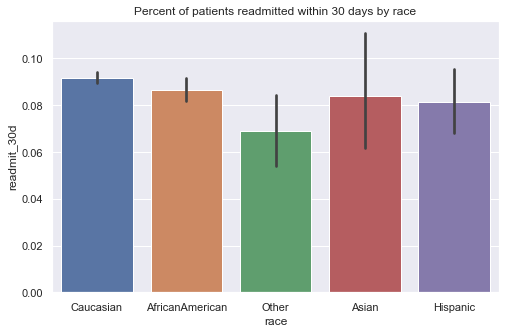

In [16]:
sns.set(rc={'figure.figsize':(8, 5)})

sns.barplot(data = diabetes_df, x = 'race', y = 'readmit_30d').\
set_title('Percent of patients readmitted within 30 days by race')

Age

In [17]:
race = pd.DataFrame(diabetes_df['age'].value_counts())
race.columns = ['Count']
race

,Count
[70-80),17748
[60-70),15683
[50-60),12349
[80-90),11102
[40-50),6828
[30-40),2692
[90-100),1760
[20-30),1121
[10-20),534
[0-10),153


Text(0.5, 1.0, 'Percent of patients readmitted within 30 days by age group')

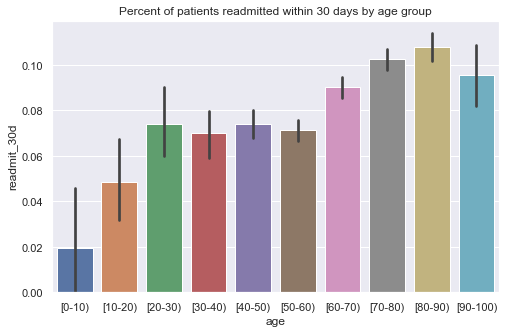

In [18]:
sns.set(rc={'figure.figsize':(8, 5)})

sns.barplot(data = diabetes_df, x = 'age', y = 'readmit_30d').\
set_title('Percent of patients readmitted within 30 days by age group')

Gender

In [19]:
race = pd.DataFrame(diabetes_df['gender'].value_counts())
race.columns = ['Count']
race

,Count
Female,37229
Male,32741


Text(0.5, 1.0, 'Percent of patients readmitted within 30 days by gender')

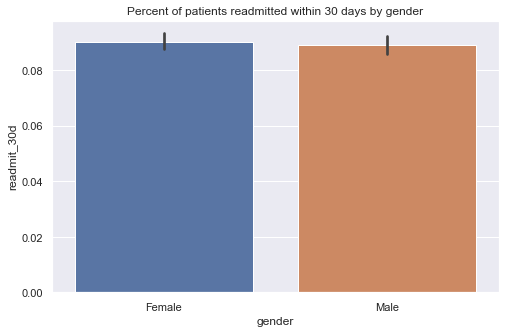

In [20]:
sns.set(rc={'figure.figsize':(8, 5)})

sns.barplot(data = diabetes_df, x = 'gender', y = 'readmit_30d').\
set_title('Percent of patients readmitted within 30 days by gender')

Discharge Type

In [21]:
race = pd.DataFrame(diabetes_df['discharge_disposition_id'].value_counts())
race.columns = ['Count']
race

,Count
1,44315
3,8784
6,8289
18,2474
2,1539
22,1409
5,913
25,778
4,541
7,409


Text(0.5, 1.0, 'Percent of patients readmitted within 30 days by discharge type')

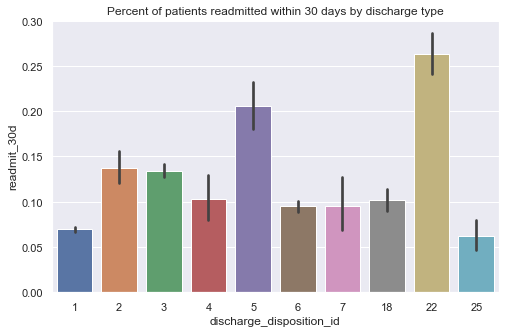

In [22]:
sns.set(rc={'figure.figsize':(8, 5)})

count500 = diabetes_df['discharge_disposition_id'].value_counts()[0:10].index
sns.barplot(data = diabetes_df[diabetes_df['discharge_disposition_id'].isin(count500)],
            x = 'discharge_disposition_id', y = 'readmit_30d').\
set_title('Percent of patients readmitted within 30 days by discharge type')

Admission Type

In [23]:
race = pd.DataFrame(diabetes_df['admission_type_id'].value_counts())
race.columns = ['Count']
race

,Count
1,35464
3,13784
2,12802
6,4516
5,3086
8,291
7,18
4,9


Text(0.5, 1.0, 'Percent of patients readmitted within 30 days by admission type')

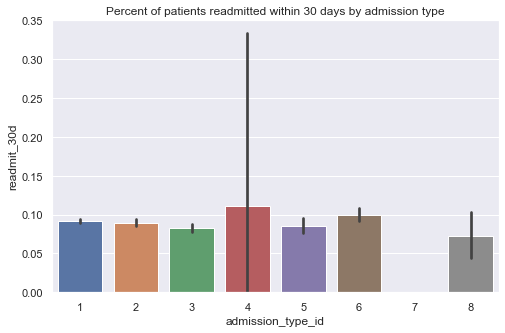

In [24]:
sns.set(rc={'figure.figsize':(8, 5)})

sns.barplot(data = diabetes_df,
            x = 'admission_type_id', y = 'readmit_30d').\
set_title('Percent of patients readmitted within 30 days by admission type')

Admission Source

In [25]:
race = pd.DataFrame(diabetes_df['admission_source_id'].value_counts())
race.columns = ['Count']
race

,Count
7,37258
1,21745
17,4820
4,2530
6,1785
2,908
5,512
20,153
3,136
9,95


Text(0.5, 1.0, 'Percent of patients readmitted within 30 days by admission source')

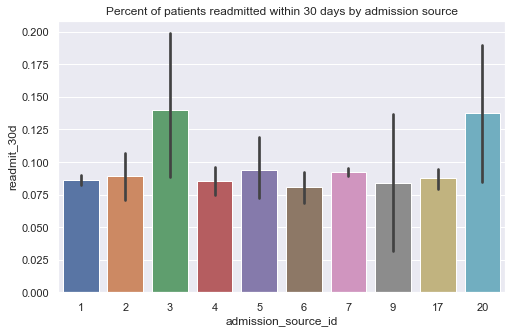

In [26]:
sns.set(rc={'figure.figsize':(8, 5)})

top10 = diabetes_df['admission_source_id'].value_counts().head(10).index
sns.barplot(data = diabetes_df[diabetes_df['admission_source_id'].isin(top10)],
            x = 'admission_source_id', y = 'readmit_30d').\
set_title('Percent of patients readmitted within 30 days by admission source')

Payer Code

In [27]:
race = pd.DataFrame(diabetes_df['payer_code'].value_counts())
race.columns = ['Count']
race

,Count
MC,19782
HM,3984
BC,3397
SP,3303
MD,2165
CP,1937
UN,1855
CM,1295
OG,647
PO,457


Text(0.5, 1.0, 'Percent of patients readmitted within 30 days by payer code')

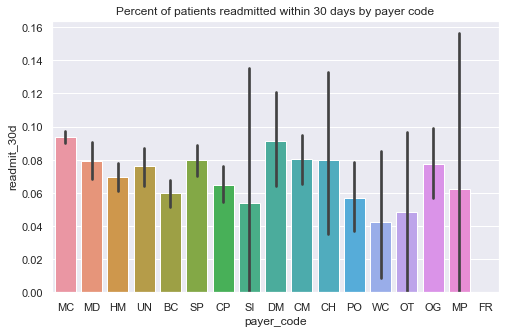

In [28]:
sns.set(rc={'figure.figsize':(8, 5)})

sns.barplot(data = diabetes_df,
            x = 'payer_code', y = 'readmit_30d', hue = None, color = None).\
set_title('Percent of patients readmitted within 30 days by payer code')

number_outpatient

Text(0.5, 1.0, 'Avg # of previous-year outpatient visits by readmission')

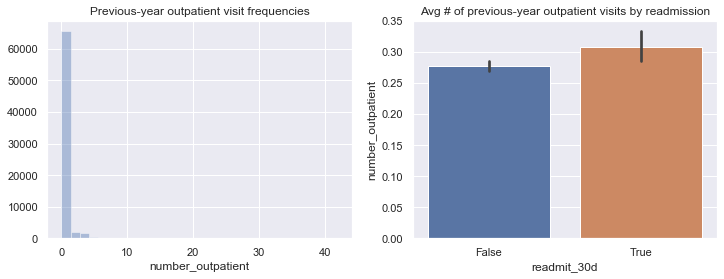

In [29]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.distplot(a = diabetes_df['number_outpatient'], bins = 30, kde = False, ax = ax1)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'number_outpatient', ax = ax2)
ax1.set_title('Previous-year outpatient visit frequencies')
ax2.set_title('Avg # of previous-year outpatient visits by readmission')

number_emergency

In [30]:
diabetes_df['number_emergency'].value_counts()

0     64870
1      3882
2       789
3       242
4        95
5        32
6        26
8         9
7         8
10        5
9         4
11        2
37        1
13        1
16        1
20        1
25        1
42        1
Name: number_emergency, dtype: int64

Text(0.5, 1.0, 'Avg # of previous-year emergency visits by readmission')

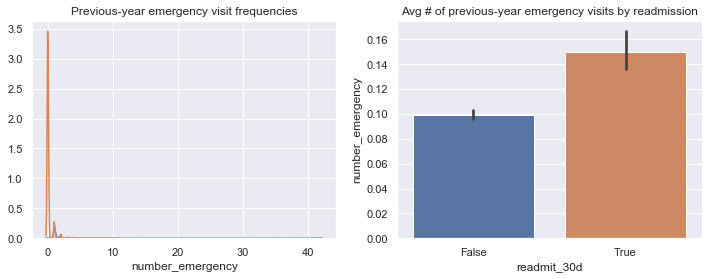

In [85]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

diabetes_0 = diabetes_df[diabetes_df['readmit_30d']==False]
diabetes_1 = diabetes_df[diabetes_df['readmit_30d']==True]

sns.distplot(a = diabetes_0['number_emergency'], kde_kws={'bw': 0.1}, ax = ax1, hist = False)
sns.distplot(a = diabetes_1['number_emergency'], kde_kws={'bw': 0.1}, ax = ax1, hist = False)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'number_emergency', ax = ax2)
ax1.set_title('Previous-year emergency visit frequencies')
ax2.set_title('Avg # of previous-year emergency visits by readmission')

number_inpatient

In [87]:
diabetes_df['number_inpatient'].value_counts()/len(diabetes_df)

0     0.882936
1     0.082807
2     0.021452
3     0.006617
4     0.003259
5     0.001458
6     0.000786
7     0.000272
8     0.000186
9     0.000100
10    0.000071
12    0.000029
11    0.000029
Name: number_inpatient, dtype: float64

Text(0.5, 1.0, 'Avg # of previous-year inpatient visits by readmission')

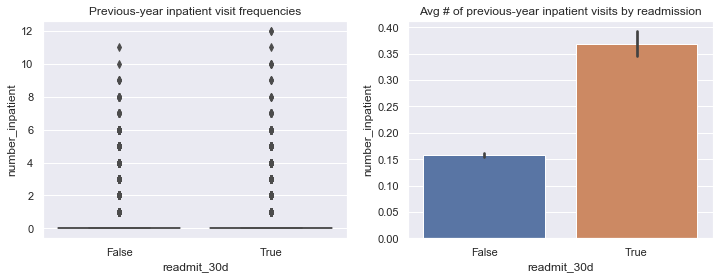

In [86]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.boxplot(data = diabetes_df, x = 'readmit_30d', y='number_inpatient', ax = ax1)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'number_inpatient', ax = ax2)
ax1.set_title('Previous-year inpatient visit frequencies')
ax2.set_title('Avg # of previous-year inpatient visits by readmission')

num_lab_procedures

Text(0.5, 1.0, 'Avg # of lab procedures received during visit by readmission')

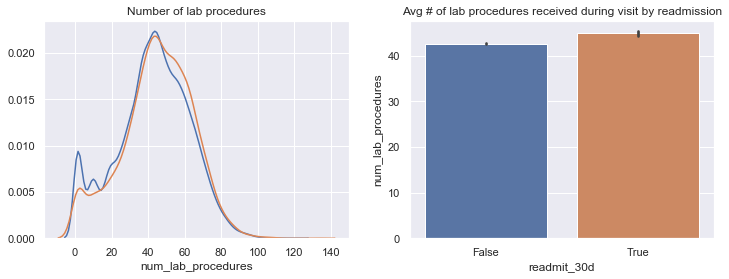

In [63]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

diabetes_1 = diabetes_df[diabetes_df['readmit_30d']==True]
diabetes_0 = diabetes_df[diabetes_df['readmit_30d']==False]

sns.distplot(a = diabetes_0['num_lab_procedures'], ax = ax1, hist = False)
sns.distplot(a = diabetes_1['num_lab_procedures'], ax = ax1, hist = False)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'num_lab_procedures', ax = ax2)
ax1.set_title('Number of lab procedures')
ax2.set_title('Avg # of lab procedures received during visit by readmission')

num_procedures

Text(0.5, 1.0, 'Avg # of non-lab procedures received during visit by readmission')

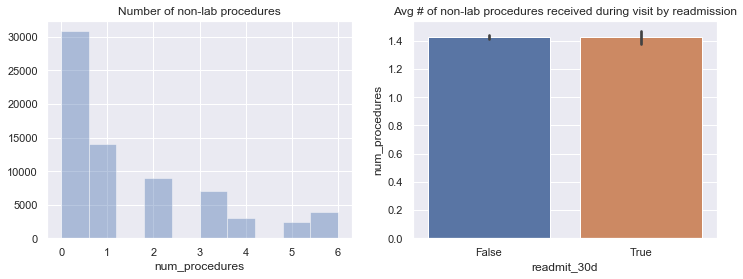

In [35]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.distplot(a = diabetes_df['num_procedures'], bins = 10, kde = False, ax = ax1)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'num_procedures', ax = ax2)
ax1.set_title('Number of non-lab procedures')
ax2.set_title('Avg # of non-lab procedures received during visit by readmission')

num_medications

Text(0.5, 1.0, 'Avg # of medicines administered durng visit by readmission')

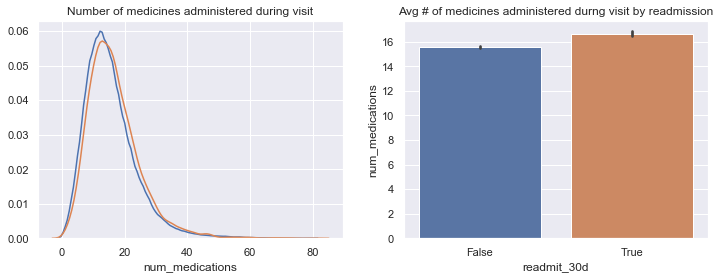

In [62]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

diabetes_1 = diabetes_df[diabetes_df['readmit_30d']==True]
diabetes_0 = diabetes_df[diabetes_df['readmit_30d']==False]

sns.distplot(a = diabetes_0['num_medications'], ax = ax1, hist = False)
sns.distplot(a = diabetes_1['num_medications'], ax = ax1, hist = False)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'num_medications', ax = ax2)
ax1.set_title('Number of medicines administered during visit')
ax2.set_title('Avg # of medicines administered durng visit by readmission')

number_diagnoses

Text(0.5, 1.0, 'Avg # of diagnoses entered by readmission')

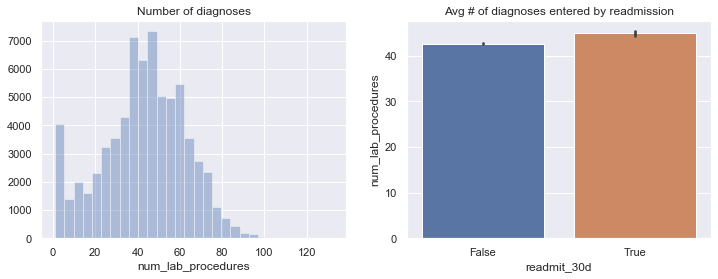

In [37]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.distplot(a = diabetes_df['num_lab_procedures'], bins = 30, kde = False, ax = ax1)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'num_lab_procedures', ax = ax2)
ax1.set_title('Number of diagnoses')
ax2.set_title('Avg # of diagnoses entered by readmission')

diag_1

In [ ]:
# removing the decimals from ICD9
diabetes_df['diag_1_main'] = diabetes_df['diag_1'].str.split('.', expand = True).drop(1, axis = 1)

In [ ]:
diabetes_df['diag_1_main'].value_counts()

In [ ]:
diabetes_df['diag_1_diab'] = (diabetes_df['diag_1_main']=='250')

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_1_diab', y = 'readmit_30d')

diag_2

In [ ]:
# removing decimals from ICD9
diabetes_df['diag_2_main'] = diabetes_df['diag_2'].str.split('.', expand = True).drop(1, axis = 1)

In [ ]:
diabetes_df['diag_2_main'].value_counts()

In [ ]:
diabetes_df['diag_2_diab'] = (diabetes_df['diag_2_main']=='250')

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_2_diab', y = 'readmit_30d')

diag_3

In [ ]:
# removing decimals from ICD9
diabetes_df['diag_3_main'] = diabetes_df['diag_3'].str.split('.', expand = True).drop(1, axis = 1)

In [ ]:
diabetes_df['diag_3_main'].value_counts()

In [ ]:
diabetes_df['diag_3_diab'] = (diabetes_df['diag_3_main']=='250')

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_3_diab', y = 'readmit_30d')

top n primary diagnoses:

In [ ]:
diabetes_df['diag_1_main'].value_counts().head(10)

top n primary diagnoses when second diagnosis is diabetes:

In [ ]:
diabetes_df.loc[diabetes_df['diag_2_main']=='250']['diag_1_main'].value_counts().head(10)

top n primary diagnoses when second or additional second diagnosis is diabetes:

In [ ]:
diabetes_df.loc[(diabetes_df['diag_2_main']=='250')|
                (diabetes_df['diag_3_main']=='250')]['diag_1_main'].value_counts().head(10)

some ICD9 codes:

- 250 Diabetes mellitus
- 786 Symptoms involving respiratory system and other chest symptoms
- 414 Other forms of chronic ischemic heart disease
- 715 Osteoarthrosis and allied disorders
- 682 Other cellulitis and abscess
- 428 Heart failure
- 434 Occlusion of cerebral arteries
- 486 Pneumonia, organism unspecified
- 410 Acute myocardial infarction
- 780 General symptoms
- 722 Intervertebral disc disorders
- 427 Cardiac dysrhythmias

(786: Symptoms involving respiratory system and other chest symptoms)

In [ ]:
diabetes_df['diag_786'] = (diabetes_df['diag_1_main']=='786')

In [ ]:
diabetes_df['diag_786'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_786', y = 'readmit_30d')

(414: other form of chronic ischemic heart diseases)

In [ ]:
# diabetes_df['diag_414'] = ((diabetes_df['diag_1_main']=='414') |
#                            (diabetes_df['diag_2_main']=='414') |
#                            (diabetes_df['diag_3_main']=='414'))
diabetes_df['diag_414'] = (diabetes_df['diag_1_main']=='414')

In [ ]:
diabetes_df['diag_414'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_414', y = 'readmit_30d')

(715: Osteoarthrosis and allied disorders)

In [ ]:
diabetes_df['diag_715'] = (diabetes_df['diag_1_main']=='715')

In [ ]:
diabetes_df['diag_715'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_715', y = 'readmit_30d')

(682: Other cellulitis and abscess)

In [ ]:
diabetes_df['diag_682'] = (diabetes_df['diag_1_main']=='682')

In [ ]:
diabetes_df['diag_682'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_682', y = 'readmit_30d')

(428: Heart failure)

In [ ]:
diabetes_df['diag_428'] = (diabetes_df['diag_1_main']=='428')

In [ ]:
diabetes_df['diag_428'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_428', y = 'readmit_30d')

(410: Acute myocardial infarction)

In [ ]:
diabetes_df['diag_410'] = (diabetes_df['diag_1_main']=='410')

In [ ]:
diabetes_df['diag_410'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_410', y = 'readmit_30d')

(427: Cardiac dysrhythmias)

In [ ]:
diabetes_df['diag_427'] = (diabetes_df['diag_1_main']=='427')

In [ ]:
diabetes_df['diag_427'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_427', y = 'readmit_30d')

(comorbidity)

In [ ]:
# will looking at this if there's time
# diabetes_df['comorbid'] = \
# diabetes_df['diag_1_main']+','+diabetes_df['diag_2_main']+','+diabetes_df['diag_3_main']

(250 in top 3 diagnoses)

In [ ]:
diabetes_df['diag_250_top3'] = ((diabetes_df['diag_1_main']=='250') |
                           (diabetes_df['diag_2_main']=='250') |
                           (diabetes_df['diag_3_main']=='250'))
diabetes_df[diabetes_df['diag_250_top3']==False][['diag_1','diag_2','diag_3']]

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_250_top3', y = 'readmit_30d')

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'diag_1_diab', y = 'readmit_30d')

number_diagnoses

In [ ]:
diabetes_df['number_diagnoses'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(12, 4)})
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False)

sns.distplot(a = diabetes_df['number_diagnoses'], bins = 10, kde = False, ax = ax1)
sns.barplot(data = diabetes_df, x = 'readmit_30d', y = 'number_diagnoses', ax = ax2)

max_glu_serum

In [ ]:
race = pd.DataFrame(diabetes_df['max_glu_serum'].value_counts())
race.columns = ['Count']
race

In [ ]:
sns.set(rc={'figure.figsize':(8, 5)})

sns.barplot(data = diabetes_df,
            x = 'max_glu_serum', y = 'readmit_30d').\
set_title('Percent of patients readmitted within 30 days by glucose test result')

A1Cresult

In [ ]:
race = pd.DataFrame(diabetes_df['A1Cresult'].value_counts())
race.columns = ['Count']
race

In [ ]:
sns.set(rc={'figure.figsize':(8, 5)})

sns.barplot(data = diabetes_df,
            x = 'A1Cresult', y = 'readmit_30d').\
set_title('Percent of patients readmitted within 30 days by A1C test result')

metformin

In [ ]:
diabetes_df['metformin'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'metformin', y = 'readmit_30d')

repaglinide

In [ ]:
diabetes_df['repaglinide'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'repaglinide', y = 'readmit_30d')

nateglinide

In [ ]:
diabetes_df['nateglinide'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'nateglinide', y = 'readmit_30d')

chlorpropamide

In [ ]:
diabetes_df['chlorpropamide'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'chlorpropamide', y = 'readmit_30d')

glimepiride

In [ ]:
diabetes_df['glimepiride'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'glimepiride', y = 'readmit_30d')

acetohexamide

In [ ]:
diabetes_df['acetohexamide'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'acetohexamide', y = 'readmit_30d')

glipizide

In [ ]:
diabetes_df['glipizide'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'glipizide', y = 'readmit_30d')

tolbutamide

In [ ]:
diabetes_df['tolbutamide'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'tolbutamide', y = 'readmit_30d')

pioglitazone

In [ ]:
diabetes_df['pioglitazone'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'pioglitazone', y = 'readmit_30d')

rosiglitazone

In [ ]:
diabetes_df['rosiglitazone'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'rosiglitazone', y = 'readmit_30d')

insulin

In [ ]:
diabetes_df['insulin'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'insulin', y = 'readmit_30d')

change

In [ ]:
diabetes_df['time_in_hospital'].value_counts()

In [ ]:
diabetes_df['change'].value_counts()

In [ ]:
sns.set(rc={'figure.figsize':(7, 4)})
sns.barplot(data = diabetes_df, x = 'change', y = 'readmit_30d')

In [ ]:
diabetes_df.race.value_counts()

In [ ]:
diabetes_df.A1Cresult.value_counts()

In [ ]:
diabetes_df.max_glu_serum.value_counts()